#### Looking at correlation between sat scores and average faculty salary

Notebook contains

1. Cleaning data
2. Building a regression model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\kirat\Documents\Career Foundry\Personal Project'

In [4]:
df_corr = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','data_correl.csv'))

In [5]:
df_corr.isnull().sum()

UNITID                0
ADM_RATE           4800
SATMTMID           5564
ACTMTMID           5607
ACTCMMID           5533
GRAD_DEBT_MDN       121
AVGFACSAL          2794
NUMBRANCH             0
LOCALE              475
CURROPER              0
PFTFAC             3183
HIGHDEG               0
Salary Category    2794
dtype: int64

In [14]:
df_drop = df_corr.dropna()

In [15]:
df_drop.shape

(1127, 13)

In [6]:
dups = df_corr.duplicated()

In [7]:
dups.shape

(6806,)

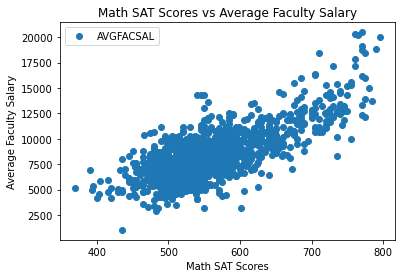

In [9]:
df_corr.plot(x = 'SATMTMID', y='AVGFACSAL',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Math SAT Scores vs Average Faculty Salary')  
plt.xlabel('Math SAT Scores')  
plt.ylabel('Average Faculty Salary')  
plt.show()

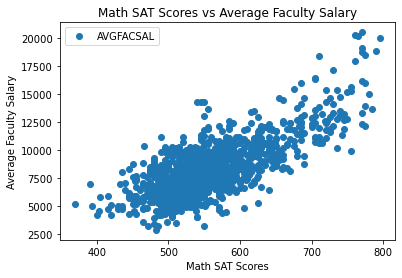

In [16]:
df_drop.plot(x = 'SATMTMID', y='AVGFACSAL',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Math SAT Scores vs Average Faculty Salary')  
plt.xlabel('Math SAT Scores')  
plt.ylabel('Average Faculty Salary')  
plt.show()

In [17]:
X = df_drop['SATMTMID'].values.reshape(-1,1)
y = df_drop['AVGFACSAL'].values.reshape(-1,1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
regression = LinearRegression()

In [20]:
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
y_predicted = regression.predict(X_test)

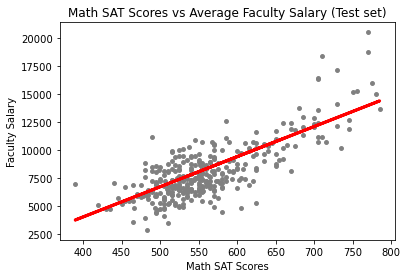

In [22]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Math SAT Scores vs Average Faculty Salary (Test set)')
plot_test.xlabel('Math SAT Scores')
plot_test.ylabel('Faculty Salary')
plot_test.show()

In [23]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [24]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[26.84682356]]
Mean squared error:  2641326.4049299587
R2 score:  0.5951450487976091


In [25]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(10)

,Actual,Predicted
0,10218.0,11016.915741
1,7825.0,8063.765149
2,9614.0,8063.765149
3,7379.0,8197.999267
4,5074.0,7258.360442
5,8902.0,8466.467502
6,5902.0,6265.027970
7,6455.0,8600.701620
8,11200.0,6452.955735
9,5171.0,6989.892206


In [26]:
y_predicted_train = regression.predict(X_train)

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[26.84682356]]
Mean squared error:  2853087.3973020026
R2 score:  0.5448486568146085


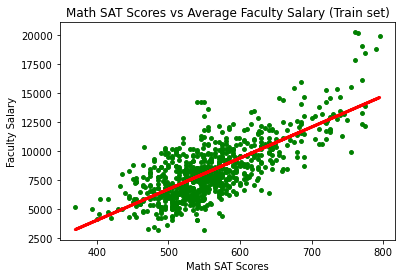

In [30]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Math SAT Scores vs Average Faculty Salary (Train set)')
plot_test.xlabel('Math SAT Scores')
plot_test.ylabel('Faculty Salary')
plot_test.show()

According to the data provided, the r2 = 0.545. This means that 54.5% of data points are explained by the regession model. There are other factors that are involved in this prediction, but the SAT scores of incomming students can be used as a good indicator of the salary of the faculty.